# FBRESNET - one example

In [1]:
# importation
import numpy as np
from torch.autograd import Variable
import torch
import matplotlib.pyplot as plt
%matplotlib inline
# local
from FBRN.myfunc import Physics
from FBRN.myfunc import MyMatmul
from FBRN.main import FBRestNet
from FBRN.model import MyModel
from FBRN.posttreat import Export_hyper

### Initialisation
The condition are as follows:
$a=1$ ,
$p=1$ ,
the constraint is $0 <x_i <1$ .

In [2]:
exp1 = FBRestNet(experimentation=Physics(2000,50,1,1), nb_blocks=20, noise = 0.05,\
                 folder = './', im_set="Set1",batch_size=[100,1],\
                 lr=1e-3, nb_epochs=[20,1])

### Dataset
Here, the dataset is of size 300, which is split in 200 trainig datas and 100 validation datas.

In [3]:
train_set, val_set = exp1.CreateDataSet()

### Trainings
The training is done over 20 epochs, learning rate is $10^{-3}$.
The Lipschitz constant is plot duroing training.
Here the parameter can be saved after training in file 'Trainings', and uploaded later.

epoch :  0  -----  validation :  0.004079490721888953
           ----- initial error : 0.6814836525555813
epoch :  1  -----  validation :  0.00393303720964909
           ----- initial error : 0.6814836525555813
epoch :  2  -----  validation :  0.003760159708855843
           ----- initial error : 0.6814836525555813
epoch :  3  -----  validation :  0.003567032769999721
           ----- initial error : 0.6814836525555813
epoch :  4  -----  validation :  0.0033451945831378302
           ----- initial error : 0.6814836525555813
epoch :  5  -----  validation :  0.0031205881933794553
           ----- initial error : 0.6814836525555813
epoch :  6  -----  validation :  0.0028819050851532006
           ----- initial error : 0.6814836525555813
epoch :  7  -----  validation :  0.00263533545005361
           ----- initial error : 0.6814836525555813
epoch :  8  -----  validation :  0.0023722270076783993
           ----- initial error : 0.6814836525555813
epoch :  9  -----  validation :  0.002105703

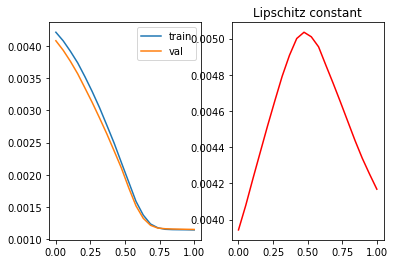

Final Lipschitz constant =  0.004167773648197


FileNotFoundError: [Errno 2] No such file or directory: './Redaction/data/lip2000_50_1_1.pt.txt'

In [4]:
exp1.train(train_set,val_set,save_model=False)

### Testing
We computre the averaged error over the testing set, and compute one example, on the left the signal are projected on the eigenbasis of operator $T_a^TT_a$, on the right on the finite element basis.

In [ ]:
average_error = exp1.test(val_set)

### Test on a Gaussian function

In [ ]:
exp1.test_gauss(noise=0.05)

### Lipschitz constant

Here we implement for the Gaussian signal the lipschitz constant of the neural network, depending on the input. s or if 

$x_{in}=x_{bias}=T_a^T y^\delta$ 

In [ ]:
exp1.model.Lipschitz(opt1="semi",opt2="entree11")

$x_{in}= 0$, and $x_{bias}= T_a^T y^\delta$ 

In [ ]:
exp1.model.Lipschitz(opt1="semi",opt2="entree01")